   Unnamed: 0  Length (major axis)  Width (minor axis)  Thickness (depth)  \
0           0                  NaN          227.940628         127.759132   
1           1                  NaN          234.188126         128.199509   
2           2                  NaN          229.418610         125.796547   
3           3                  NaN          232.763153         125.918808   
4           4                  NaN          230.150742         107.253448   

      Area   Perimeter  Roundness  Solidity  Compactness  Aspect Ratio  \
0  22619.0  643.813269        NaN  0.973384     1.458265           NaN   
1  23038.0  680.984841        NaN  0.957304     1.601844           NaN   
2  22386.5  646.943212        NaN  0.967270     1.487772           NaN   
3  22578.5  661.227483        NaN  0.965512     1.540979           NaN   
4  19068.0  624.842706        NaN  0.951450     1.629395           NaN   

   Eccentricity    Extent  Convex hull(convex area)   Type  
0           NaN  0.681193      

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50, RProp Loss: 0.0268, RProp Accuracy: 0.9951, SGD Loss: 0.2976, SGD Accuracy: 0.9032
Epoch 2/50, RProp Loss: 0.2162, RProp Accuracy: 0.9325, SGD Loss: 0.2969, SGD Accuracy: 0.9044
Epoch 3/50, RProp Loss: 0.2832, RProp Accuracy: 0.9053, SGD Loss: 0.2965, SGD Accuracy: 0.9050
Epoch 4/50, RProp Loss: 0.3002, RProp Accuracy: 0.8997, SGD Loss: 0.2962, SGD Accuracy: 0.9053
Epoch 5/50, RProp Loss: 0.3041, RProp Accuracy: 0.8998, SGD Loss: 0.2960, SGD Accuracy: 0.9054
Epoch 6/50, RProp Loss: 0.3045, RProp Accuracy: 0.9008, SGD Loss: 0.2958, SGD Accuracy: 0.9054
Epoch 7/50, RProp Loss: 0.3039, RProp Accuracy: 0.9015, SGD Loss: 0.2957, SGD Accuracy: 0.9053
Epoch 8/50, RProp Loss: 0.3031, RProp Accuracy: 0.9020, SGD Loss: 0.2956, SGD Accuracy: 0.9053
Epoch 9/50, RProp Loss: 0.3022, RProp Accuracy: 0.9024, SGD Loss: 0.2954, SGD Accuracy: 0.9053
Epoch 10/50, RProp Loss: 0.3015, RProp Accuracy: 0.9028, SGD Loss: 0.2953, SGD Accuracy: 0.9052
Epoch 11/50, RProp Loss: 0.3008, RProp Accuracy: 

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters: {'model__activation': 'tanh', 'model__hidden_units': 64}
Best Score: 0.9768109872645662


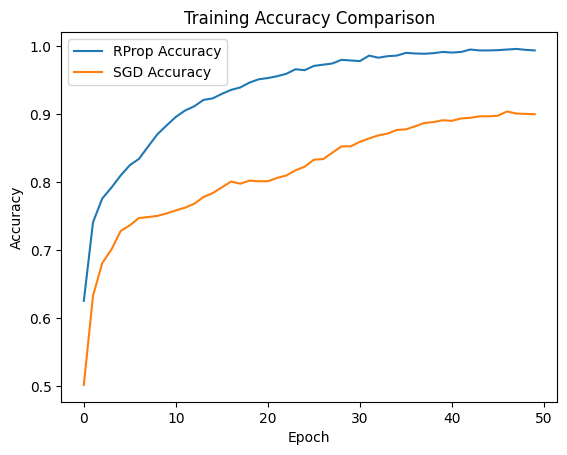

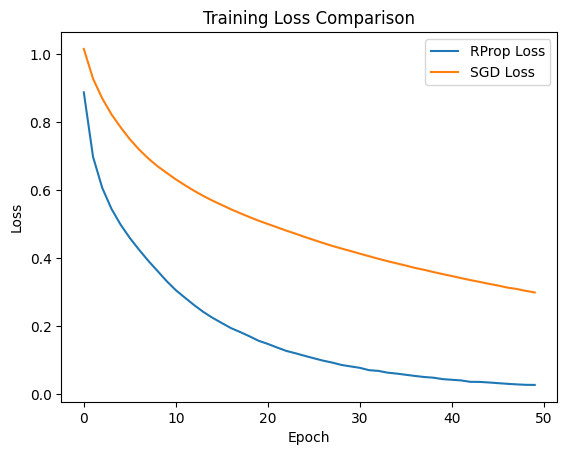

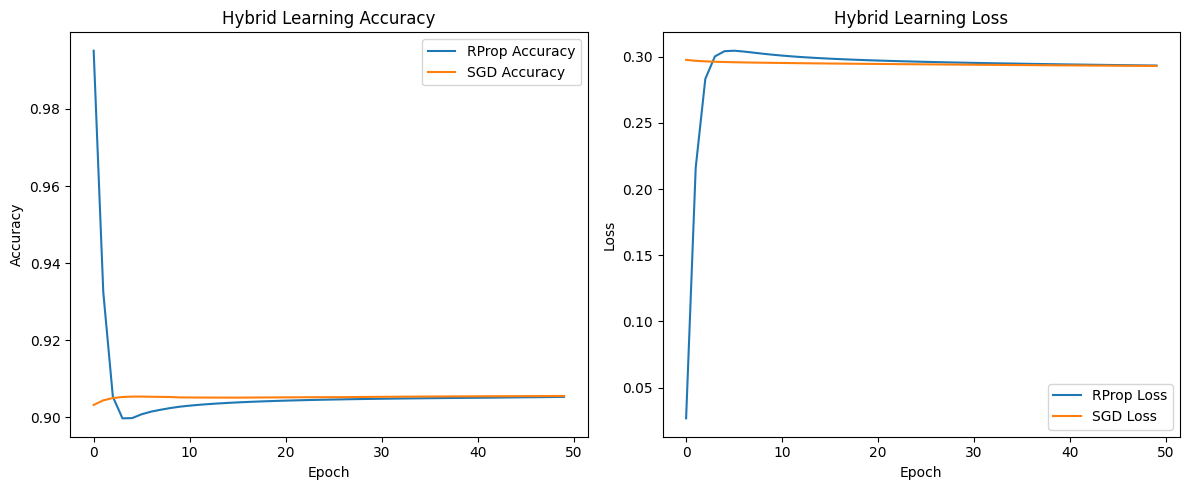

Weight updates correlation between RProp and SGD: [0.9999973472360681, 0.9999930973937199, 0.9999964212014835, 0.9999875834127632, 0.9999991398176752, 0.9999986465472497]


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from google.colab import files

# Load the dataset
data = pd.read_csv("Almond.csv")

# Display the first few records of the dataset
print(data.head())

# Handling NaN with means
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Encode the 'Type' column
label_encoder = LabelEncoder()
data['Type'] = label_encoder.fit_transform(data['Type'])

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

# Set target and input
X = data.drop(columns=['Type'])
y = data['Type']

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define neural network architecture
def create_model(activation='relu', hidden_units=32):
    model = keras.Sequential([
        layers.Dense(hidden_units, activation=activation, input_shape=(X_train_scaled.shape[1],)),
        layers.Dense(hidden_units, activation=activation),
        layers.Dense(3, activation='softmax')  # Assuming 3 classes for classification
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train with RProp
model_rprop = create_model()
rprop_optimizer = keras.optimizers.RMSprop()  # RProp equivalent in Keras
model_rprop.compile(optimizer=rprop_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rprop_history = model_rprop.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Train with SGD
model_sgd = create_model()
sgd_optimizer = keras.optimizers.SGD()  # Standard SGD optimizer
model_sgd.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
sgd_history = model_sgd.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Hybrid Learning Class
class HybridLearning:
    def __init__(self, model1, model2, X_train, y_train, epochs):
        self.model1 = model1
        self.model2 = model2
        self.X_train = X_train
        self.y_train = y_train
        self.epochs = epochs
        self.losses1 = []  # Store loss for model1
        self.losses2 = []  # Store loss for model2
        self.accuracies1 = []  # Store accuracy for model1
        self.accuracies2 = []  # Store accuracy for model2

    def train(self):
        for epoch in range(self.epochs):
            # Train both models
            weights1 = self.model1.train_on_batch(self.X_train, self.y_train)
            weights2 = self.model2.train_on_batch(self.X_train, self.y_train)

            # Store loss and accuracy
            self.losses1.append(weights1[0])
            self.accuracies1.append(weights1[1])
            self.losses2.append(weights2[0])
            self.accuracies2.append(weights2[1])

            # Average the weights
            avg_weights = [(w1 + w2) / 2 for w1, w2 in zip(self.model1.get_weights(), self.model2.get_weights())]
            self.model1.set_weights(avg_weights)  # Update model1 with average weights

            print(f'Epoch {epoch + 1}/{self.epochs}, RProp Loss: {weights1[0]:.4f}, RProp Accuracy: {weights1[1]:.4f}, SGD Loss: {weights2[0]:.4f}, SGD Accuracy: {weights2[1]:.4f}')

# Create and train the hybrid model
hybrid_model = create_model()
hybrid_learning = HybridLearning(model_rprop, model_sgd, X_train_scaled, y_train, epochs=50)
hybrid_learning.train()

# Hyperparameter Optimization
def build_model(hidden_units=32, activation='relu'):
    model = keras.Sequential([
        layers.Dense(hidden_units, activation=activation, input_shape=(X_train_scaled.shape[1],)),
        layers.Dense(hidden_units, activation=activation),
        layers.Dense(3, activation='softmax')  # For 3 classes
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier
model = KerasClassifier(build_fn=build_model, epochs=50, batch_size=32, verbose=0)

# Define grid search parameters
param_grid = {
    'model__hidden_units': [16, 32, 64], # Pass parameters to the model using 'model__'
    'model__activation': ['relu', 'tanh'],
}

# Perform Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print(f'Best Parameters: {grid_result.best_params_}')
print(f'Best Score: {grid_result.best_score_}')

# Plot training history for RProp and SGD
plt.plot(rprop_history.history['accuracy'], label='RProp Accuracy')
plt.plot(sgd_history.history['accuracy'], label='SGD Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Comparison')
plt.legend()
plt.show()

# Plot loss for RProp and SGD
plt.plot(rprop_history.history['loss'], label='RProp Loss')
plt.plot(sgd_history.history['loss'], label='SGD Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.show()

# Plot hybrid learning accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(hybrid_learning.accuracies1, label='RProp Accuracy')
plt.plot(hybrid_learning.accuracies2, label='SGD Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Hybrid Learning Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(hybrid_learning.losses1, label='RProp Loss')
plt.plot(hybrid_learning.losses2, label='SGD Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Hybrid Learning Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Analyze weight updates correlation
weights_rprop = model_rprop.get_weights()
weights_sgd = model_sgd.get_weights()

# Check for correlation
correlations = [np.corrcoef(w1.flatten(), w2.flatten())[0, 1] for w1, w2 in zip(weights_rprop, weights_sgd)]
print("Weight updates correlation between RProp and SGD:", correlations)


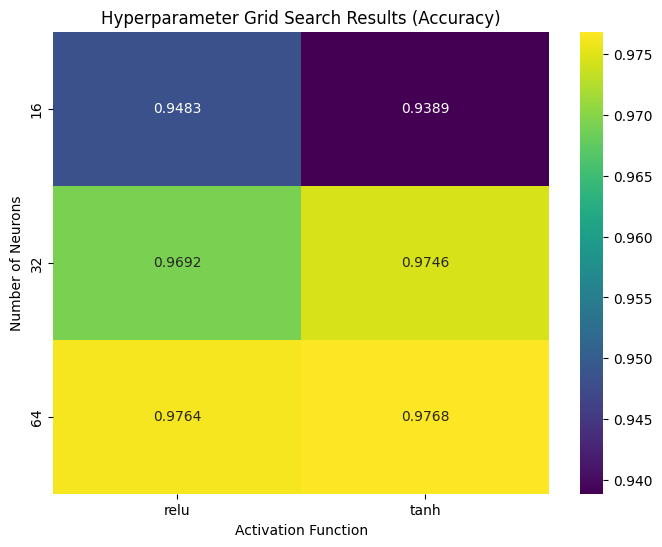

In [7]:
# Load the grid search results into a DataFrame
results = pd.DataFrame(grid.cv_results_)

# Group by 'param_model_neurons' and 'param_model_learning_rate' and aggregate the mean test score
grouped_results = results.groupby(['param_model__hidden_units', 'param_model__activation']).agg({ # Changed column names to include 'model__' prefix
    'mean_test_score': 'mean'
}).reset_index()

# Now pivot the grouped results for the heatmap
scores_matrix = grouped_results.pivot(index='param_model__hidden_units', # Changed column names to include 'model__' prefix
                                      columns='param_model__activation', # Changed column names to include 'model__' prefix
                                      values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(scores_matrix, annot=True, fmt=".4f", cmap='viridis')
plt.title('Hyperparameter Grid Search Results (Accuracy)')
plt.xlabel('Activation Function') # Changed label to reflect the parameter
plt.ylabel('Number of Neurons')
plt.show()

In [2]:
!pip install scikeras[tensorflow] scikit-learn seaborn imbalanced-learn